In [1]:
import os
import pandas as pd
import numpy as np

In [2]:
# paths
data_dir = r'data'
data_pth = os.path.join(data_dir, r'Almond.csv')

In [3]:
data = pd.read_csv(data_pth)

In [4]:
# Drop the first (index) column
data = data.drop(data.columns[0], axis=1)

In [5]:
print("Number of rows: ", data.shape[0])
print("Number of cols: ", data.shape[1])
print("Columns: ", [col for col in data.columns])
print("==========================================")

print("Num unique types: ", data['Type'].nunique())
print("Unique types:\n", data['Type'].value_counts())

Number of rows:  2803
Number of cols:  13
Columns:  ['Length (major axis)', 'Width (minor axis)', 'Thickness (depth)', 'Area', 'Perimeter', 'Roundness', 'Solidity', 'Compactness', 'Aspect Ratio', 'Eccentricity', 'Extent', 'Convex hull(convex area)', 'Type']
Num unique types:  3
Unique types:
 Type
SANORA     943
MAMRA      933
REGULAR    927
Name: count, dtype: int64


In [6]:
# print number of null values per column
print("==========================================")
print("Number of null values per column:")
print(data.isnull().sum())


Number of null values per column:
Length (major axis)          857
Width (minor axis)           942
Thickness (depth)           1004
Area                           0
Perimeter                      0
Roundness                    857
Solidity                       0
Compactness                    0
Aspect Ratio                1799
Eccentricity                1799
Extent                         0
Convex hull(convex area)       0
Type                           0
dtype: int64


In [7]:
# Add a column called perspective
# - if thickness is null, then perspective is -> 0
# - if length is null tnen perspective is -> 1 
# - if width is null then perspective is  -> 2 

data['Perspective'] = data.apply(lambda row: 0 if pd.isnull(row['Thickness (depth)']) else 1 if pd.isnull(row['Length (major axis)']) else 2, axis=1)

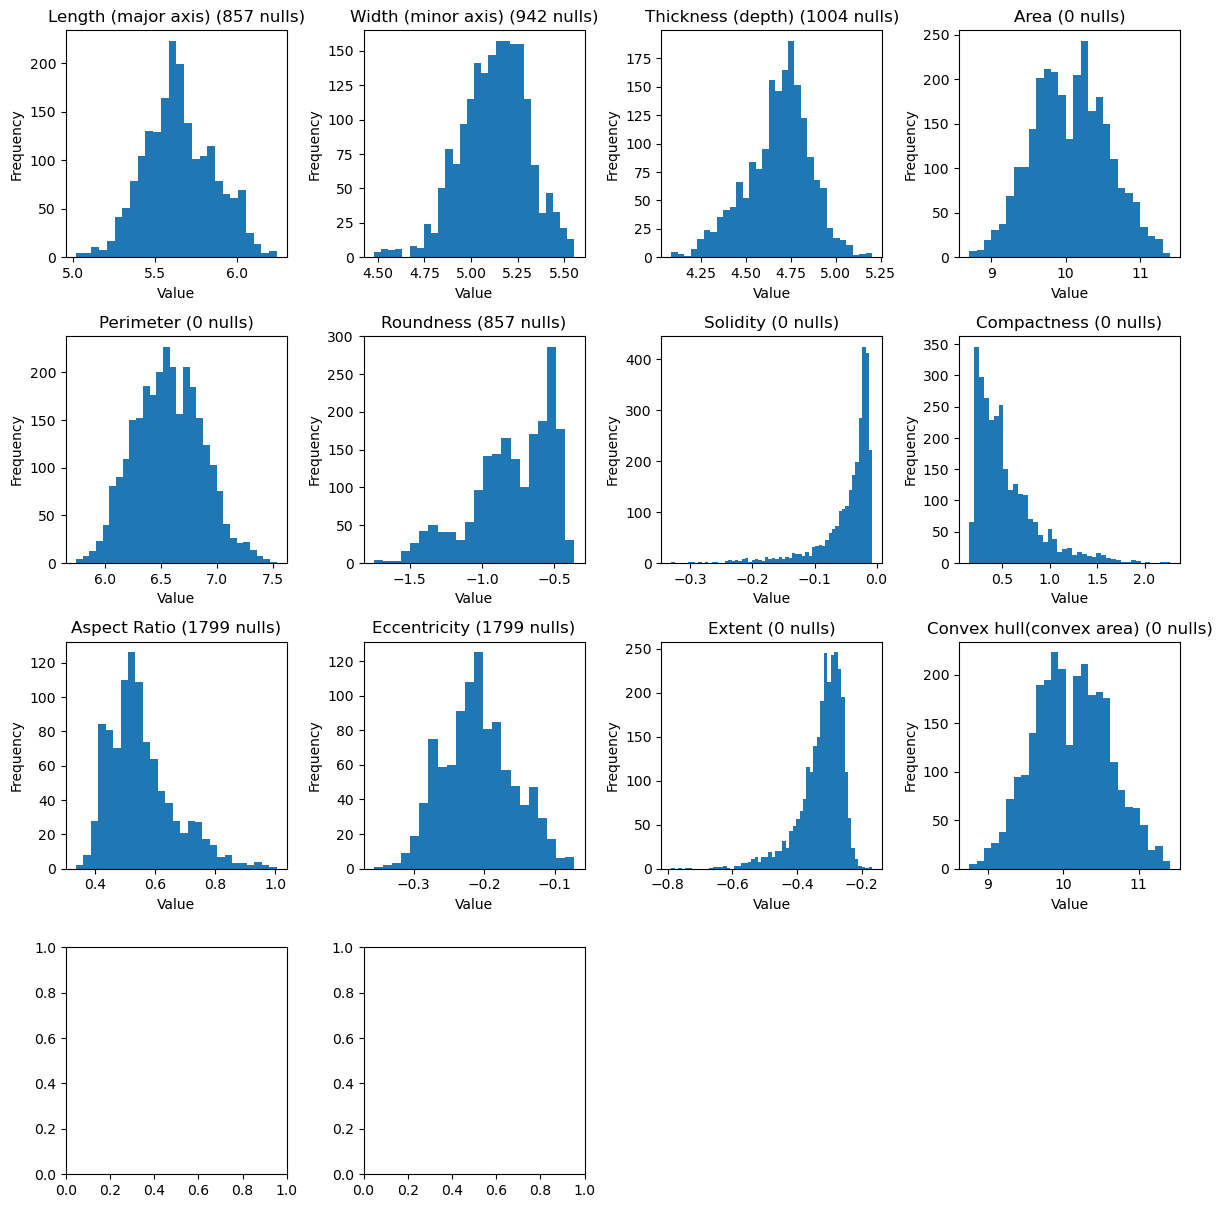

In [9]:
# Plot a subplot histogram for each column, ignore null values
import matplotlib.pyplot as plt
fig, axs = plt.subplots(5, 4, figsize=(12, 15))

flat_axs = axs.flatten()
for i, col in enumerate(data.columns):
    non_null_data = data[col].dropna()
    num_null = data[col].isnull().sum()
    flat_axs[i].hist(non_null_data, bins='auto')
    flat_axs[i].set_title(col + f' ({num_null} nulls)')
    flat_axs[i].set_xlabel('Value')
    flat_axs[i].set_ylabel('Frequency')
    

# hide the unused subplots
for i in range(data.shape[1], len(flat_axs)):
    fig.delaxes(flat_axs[i])

plt.tight_layout()
plt.show()


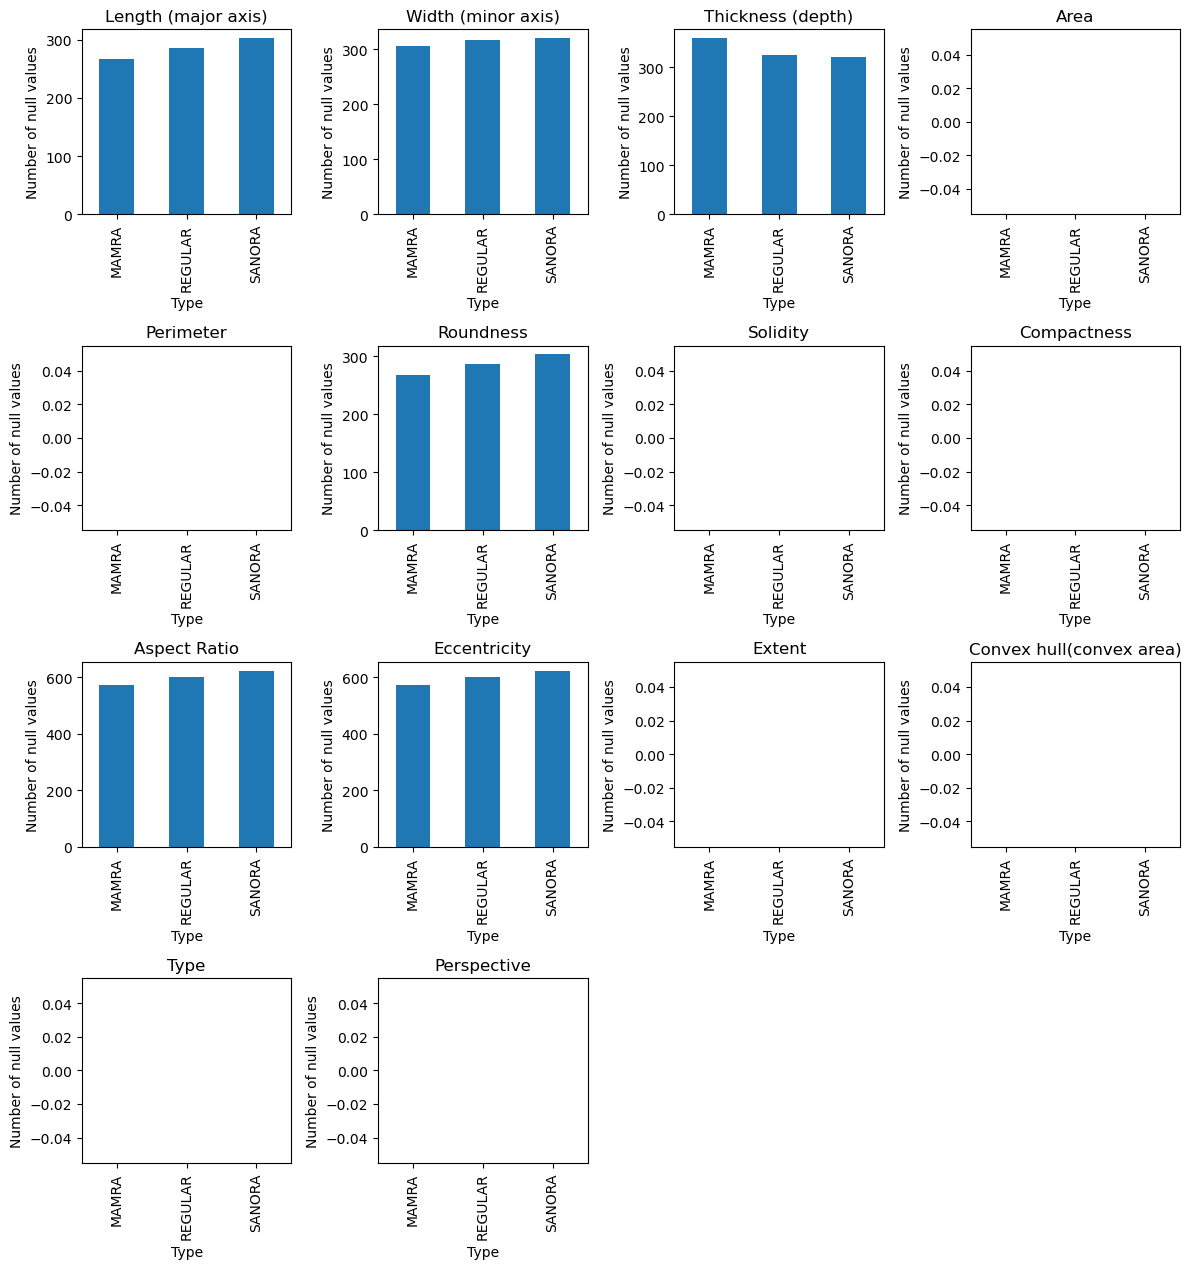

In [9]:
# make bar graph of number null values for each column per Type
fig, axs = plt.subplots(5, 4, figsize=(12, 15))

flat_axs = axs.flatten()
for i, col in enumerate(data.columns):
    nulls = data.groupby('Type')[col].apply(lambda x: x.isnull().sum())
    nulls.plot(kind='bar', ax=flat_axs[i])
    flat_axs[i].set_title(col)
    flat_axs[i].set_ylabel('Number of null values')
    flat_axs[i].set_xlabel('Type')

# hide the unused subplots
for i in range(data.shape[1], len(flat_axs)):
    fig.delaxes(flat_axs[i])

plt.tight_layout()
plt.show()


